## 가중평균반사도 예측모형

- 이미지 픽셀 값 -> 반사도를 predict 하는 모델 구축

### 데이터 전처리 부분

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Solar.csv",header=0).iloc[:,:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   R          32 non-null     int64  
 1   G          32 non-null     int64  
 2   B          32 non-null     int64  
 3   R_I        32 non-null     object 
 4   Thickness  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [12]:
df.head()

,R,G,B,R_I,Thickness
0,25,31,53,1.947,73.1
1,6,12,40,1.946,73.2
2,9,14,20,1.949,72.5
3,3,7,36,1.948,73.9
4,15,21,55,1.965,74.2


In [4]:
df.R_I = df.R_I.str.replace(",",".").astype(float)

In [41]:
reflectance = pd.read_csv('reflectance.csv',header=0)
reflectance.head()

,1200,1195,1190,1185,1180,1175,1170,1165,1160,1155,...,345,340,335,330,325,320,315,310,305,300
0,96.6331,96.5916,96.4845,96.2623,95.8907,95.3450,94.6298,93.7546,92.7405,91.5877,...,56.3231,55.9099,55.8171,55.6715,55.4601,55.1395,54.6931,54.1511,53.5249,52.8991
1,92.4867,92.4547,92.3593,92.1557,91.8202,91.3254,90.6806,89.8845,88.9556,87.8934,...,56.7971,56.5143,56.4169,56.2839,56.0708,55.7749,55.3640,54.8170,54.2150,53.6033
2,96.9970,96.9578,96.8509,96.6398,96.2781,95.7467,95.0391,94.1767,93.1700,92.0249,...,56.3937,56.2287,56.2186,56.1558,56.0490,55.8406,55.5234,55.0830,54.6321,54.1589
3,96.7672,96.7216,96.6133,96.3942,96.0234,95.4852,94.7694,93.8971,92.8864,91.7317,...,56.3366,55.9816,55.9209,55.8066,55.6147,55.3500,54.9550,54.4818,53.9408,53.3935
4,97.2375,97.1881,97.0759,96.8496,96.4741,95.9199,95.1903,94.2958,93.2626,92.0902,...,56.4141,55.8102,55.4447,55.0348,54.5248,53.8755,53.1101,52.1799,51.1362,49.9881


In [43]:
data = pd.concat([df, reflectance], axis=1).head()

In [47]:
data.drop(columns='Thickness', axis=1, inplace=True)

In [48]:
seed = 42

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train, test = train_test_split(df, test_size=0.3, random_state=seed)
X_train, y_train = train.iloc[:,:4], train.iloc[:,4:]
X_test, y_test = test.iloc[:,:4], test.iloc[:,4:]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [52]:
X_train

array([[ 15.   ,  21.   ,  55.   ,   1.965],
       [  9.   ,  40.   ,  71.   ,   1.977],
       [ 12.   ,  18.   ,  45.   ,   1.96 ],
       [ 38.   ,  57.   ,  90.   ,   1.941],
       [ 19.   ,  33.   ,  70.   ,   1.966],
       [  6.   ,  36.   ,  72.   ,   1.992],
       [  6.   ,  12.   ,  40.   ,   1.946],
       [  9.   ,  14.   ,  20.   ,   1.949],
       [ 40.   ,  69.   ,  99.   ,   1.975],
       [  3.   ,   7.   ,  36.   ,   1.948],
       [  8.   ,  38.   ,  74.   ,   1.988],
       [ 40.   ,  69.   , 101.   ,   1.972],
       [  5.   ,  31.   ,  64.   ,   1.987],
       [ 11.   ,  42.   ,  70.   ,   1.979],
       [ 54.   ,  75.   ,  94.   ,   1.96 ],
       [  7.   ,  39.   ,  77.   ,   1.987],
       [  5.   ,   9.   ,  46.   ,   1.965],
       [ 28.   ,  41.   ,  76.   ,   1.968],
       [ 39.   ,  58.   ,  91.   ,   1.944],
       [ 44.   ,  69.   ,  91.   ,   1.966],
       [  9.   ,  40.   ,  71.   ,   1.977],
       [ 11.   ,  18.   ,  37.   ,   1.966]])

### AutoML TEST

In [53]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the model on the test set
mse = tpot.score(X_test, y_test)
print('Test set mean squared error: %.3f' % mse)

# Export the best pipeline as Python code
tpot.export('tpot_best_pipeline.py')

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -40.47613538832197


In [ ]:
y_pred = tpot.predict(X_test)
y_pred_train = tpot.predict(X_train)

In [ ]:
y_pred

array([117.25      ,  84.55      , 103.27142857,  91.3       ,
        77.2       ,  76.9       , 117.04      , 102.31111111,
        86.44444444,  76.975     ])

In [ ]:
idx = list(i for i in range(len(y_pred)))

In [ ]:
y_test.index = idx
y_pred = pd.DataFrame(y_pred)[0]

In [ ]:
y_pred

0    117.250000
1     84.550000
2    103.271429
3     91.300000
4     77.200000
5     76.900000
6    117.040000
7    102.311111
8     86.444444
9     76.975000
Name: 0, dtype: float64

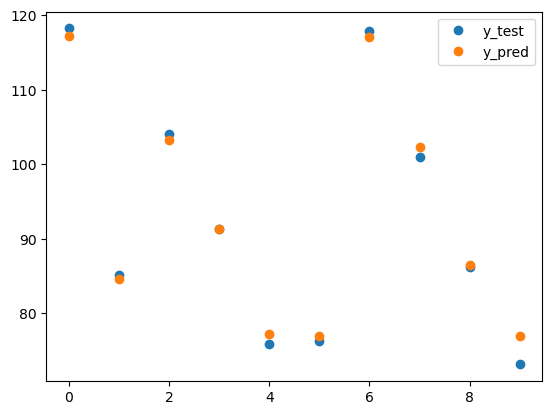

In [ ]:
plt.plot(y_test, 'o')
plt.plot(y_pred, 'o')
#plt.plot(y_train, 'o')
#plt.plot(y_pred_train, 'o')
plt.legend(['y_test', 'y_pred', 'y_train', 'y_pred_train'])

AutoML만 사용하였을 때, 성능 매우 우수함